# Week-away Forecasting for Supply and Demand 

## Objective 

Build capabilities for forecasting week-away sequential data and time-series. The forecast should accurate compared to benchmarks such as 30-minute average on historical data (date-arrange TBD) and warn the system if it encounters anomalies. 

## Key Results 

- Measure the mean absolute percentage error (MAPE) 
- Forecast with several models and observe the difference compared to 30min average with these models: 
    --logistic regression 
    --neural nets 
    --KDE 
- Deal with undampened demand with session and eye-ball modeling, observe difference across dampened/undampened 
- Create dashboards that can visualize forecasts 


## Problem Breakdown 

Brainstorm 
- Support different geo-fences 
- BAF/undampened modeling, take in as feature to predict the result 
        - we can predict BAF 
        - we want all forecasts to be undampened, meaning assume there is no BAF 
- Session and eye-ball modeling 
- Fine-grained Hexagonal data 
- Anomally detection 


## Todo Steps 

- load and clean up data 
- build first version of model 
- validate and test versus baseline 


In [1]:
### --- data loading processing cleaning etc --- 

import numpy as np 
import pandas as pd 

# load up all files into panda frames 

filenames = [#'SF_supply_eff_rel_super_data_2018-01-01_to_2018-01-08.csv', \
             #'SF_supply_eff_rel_super_data_2018-01-08_to_2018-01-15.csv', \
             'SF_supply_eff_rel_super_data_2018-01-22_to_2018-01-29.csv', \
             'SF_supply_eff_rel_super_data_2018-01-29_to_2018-02-05.csv', \
             'SF_supply_eff_rel_super_data_2018-02-05_to_2018-02-12.csv', \
             'SF_supply_eff_rel_super_data_2018-02-12_to_2018-02-19.csv', \
             'SF_supply_eff_rel_super_data_2018-02-19_to_2018-02-26.csv', \
             'SF_supply_eff_rel_super_data_2018-02-26_to_2018-03-05.csv', \
             'SF_supply_eff_rel_super_data_2018-03-05_to_2018-03-12.csv', \
             'SF_supply_eff_rel_super_data_2018-03-12_to_2018-03-19.csv', \
             'SF_supply_eff_rel_super_data_2018-03-19_to_2018-03-26.csv', \
             'SF_supply_eff_rel_super_data_2018-03-26_to_2018-04-02.csv', \
             'SF_supply_eff_rel_super_data_2018-04-02_to_2018-04-09.csv', \
             'SF_supply_eff_rel_super_data_2018-04-09_to_2018-04-16.csv', \
             'SF_supply_eff_rel_super_data_2018-04-16_to_2018-04-23.csv', \
             'SF_supply_eff_rel_super_data_2018-04-23_to_2018-04-30.csv', \
             'SF_supply_eff_rel_super_data_2018-04-30_to_2018-05-07.csv', \
             'SF_supply_eff_rel_super_data_2018-05-07_to_2018-05-14.csv', \
             'SF_supply_eff_rel_super_data_2018-05-14_to_2018-05-21.csv', \
             'SF_supply_eff_rel_super_data_2018-05-21_to_2018-05-28.csv', \
             'SF_supply_eff_rel_super_data_2018-05-28_to_2018-06-04.csv', \
             'SF_supply_eff_rel_super_data_2018-06-04_to_2018-06-11.csv', \
             'SF_supply_eff_rel_super_data_2018-06-11_to_2018-06-18.csv', \
             'SF_supply_eff_rel_super_data_2018-06-18_to_2018-06-25.csv', \
             'SF_supply_eff_rel_super_data_2018-06-25_to_2018-07-02.csv', \
             'SF_supply_eff_rel_super_data_2018-07-02_to_2018-07-09.csv', \
             'SF_supply_eff_rel_super_data_2018-07-09_to_2018-07-16.csv', \
             'SF_supply_eff_rel_super_data_2018-07-16_to_2018-07-23.csv', \
             'SF_supply_eff_rel_super_data_2018-07-23_to_2018-07-30.csv', \
             'SF_supply_eff_rel_super_data_2018-07-30_to_2018-08-06.csv', \
             'SF_supply_eff_rel_super_data_2018-08-06_to_2018-08-13.csv', \
             'SF_supply_eff_rel_super_data_2018-08-13_to_2018-08-20.csv', \
             'SF_supply_eff_rel_super_data_2018-08-20_to_2018-08-27.csv', \
             'SF_supply_eff_rel_super_data_2018-08-27_to_2018-09-03.csv', \
             'SF_supply_eff_rel_super_data_2018-09-03_to_2018-09-10.csv', \
             'SF_supply_eff_rel_super_data_2018-09-10_to_2018-09-17.csv', \
             'SF_supply_eff_rel_super_data_2018-09-17_to_2018-09-24.csv', \
             'SF_supply_eff_rel_super_data_2018-09-24_to_2018-10-01.csv', \
             'SF_supply_eff_rel_super_data_2018-10-01_to_2018-10-08.csv', \
             'SF_supply_eff_rel_super_data_2018-10-08_to_2018-10-15.csv', \
             'SF_supply_eff_rel_super_data_2018-10-15_to_2018-10-22.csv', \
             'SF_supply_eff_rel_super_data_2018-10-22_to_2018-10-29.csv', \
             'SF_supply_eff_rel_super_data_2018-10-29_to_2018-11-05.csv', \
             'SF_supply_eff_rel_super_data_2018-11-05_to_2018-11-12.csv']

# union all data 
data = pd.read_csv(filenames[0]) 
print(data.loc[0]) 
for i in range(len(filenames) - 1): 
    print('processing file: ' + str(i + 1)) 
    filename = filenames[i + 1] 
    if i == 0: #i > 2: 
        d = pd.read_csv(filename) 
    else: 
        d = pd.read_csv(filename, skiprows=[0]) 
    print(d.loc[0]) 
    data = pd.concat([data, d], axis=0) 

print(len(data.columns)) 


Unnamed: 0                                                    0
accept_to_pickup_hours                                    0.145
at_dropoff_hours                                      0.0383333
at_pickup_hours                                       0.0966667
baf                                                           0
booking_fee                                                4.99
city_id                                                       1
city_name                                         San Francisco
commission                                                -2.54
commission_rate                                            0.25
driver_flow                                                 P2P
driver_tag                                               nonopt
en_route_supply_hours                                  0.372222
geofence                                            Norcal - SF
geofence_id                b6697828-a7ce-4cb4-afe7-bdee03512336
gross_base_payment                      

/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/ipykernel/__main__.py:64: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



processing file: 33
Unnamed: 0                                                    0
city_name                                         San Francisco
city_id                                                       1
hour_of                                     2018-09-10 04:00:00
geofence                                     Norcal - Daly City
geofence_id                d83fd0ce-1bd0-47c8-8a7e-c31c4e12028e
supply_class                                                 xd
driver_flow                                                 P2P
driver_tag                                               nonopt
accept_to_pickup_hours                                 0.235556
at_pickup_hours                                        0.302222
pickup_to_dropoff_hours                                0.144444
at_dropoff_hours                                      0.0594444
haversine_miles                                         2.68816
trips                                                         2
booking_fee         

In [2]:
import datetime 

## group by hour add the supply hours, and filter dedicated drivers 

cols = ['Index', 'Time', 'OrdinalTime', 'SupplyHours'] 

dtstr = '2018-01-22 03:00:00' 

ts_data = pd.DataFrame(columns=cols) 

count = 0 
while dtstr != '2018-11-12 03:00:00': 
    if count % 100 == 0: 
        print(count)
    yr = int(dtstr.split('-')[0])
    mth = int(dtstr.split('-')[1])
    dy = int(dtstr.split('-')[2].split(' ')[0])
    
    """ 
    print(yr)
    print(mth)
    print(dy)
    """ 
    
    hr = int(dtstr.split(':')[0].split(' ')[1])
    min = int(dtstr.split(':')[1])
    sec = int(dtstr.split(':')[2])
    
    """ 
    print(hr)
    print(min)
    print(sec)
    """ 
    
    x = datetime.datetime(yr, mth, dy, hr, min, sec) 
    
    y = x + datetime.timedelta(hours=1) 
    dtstr = y.isoformat(' ') 
    
    daydata = data.loc[data['hour_of']==dtstr] 
    
    SH = daydata['supply_hours'] 
    sh = np.sum(SH.as_matrix()[~np.isnan(SH.as_matrix())]) 
    
    ## aggregate supply days 
    d = pd.DataFrame(np.asarray([[count, dtstr, y, sh]]), columns=cols, index = [count]) 
    count = count + 1 
    ts_data = ts_data.append(d) 

#print(ts_data) 
    

0


/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/ipykernel/__main__.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000


/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


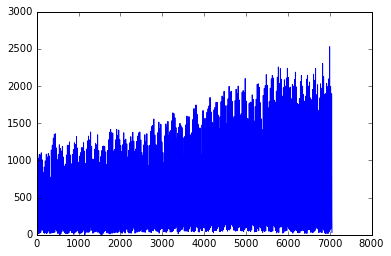

    Index                 Time          OrdinalTime SupplyHours
338   338  2018-02-05 06:00:00  2018-02-05 06:00:00     186.599


In [3]:
import matplotlib.pyplot as plt 

plt.plot(ts_data['Index'].as_matrix(), ts_data['SupplyHours'].as_matrix()) 

plt.show() 

print(ts_data.loc[ts_data['Index'] == 338]) 


/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Pringing out Weekly patterns:
Week: 1


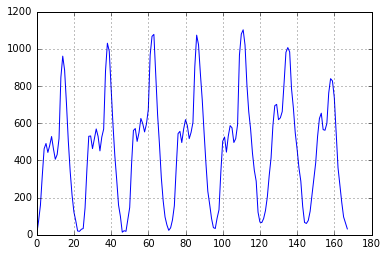

Week: 2


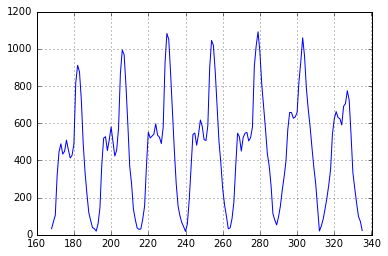

Week: 3


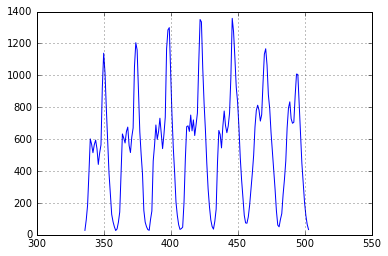

Week: 4


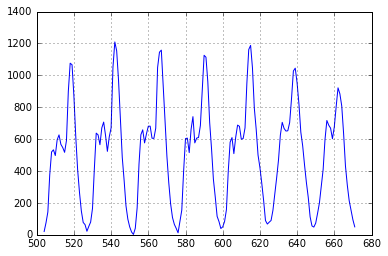

Week: 5


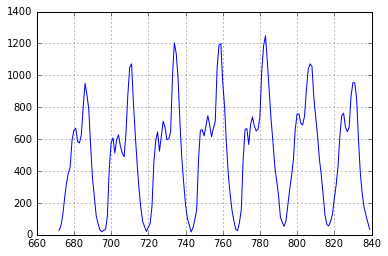

Week: 6


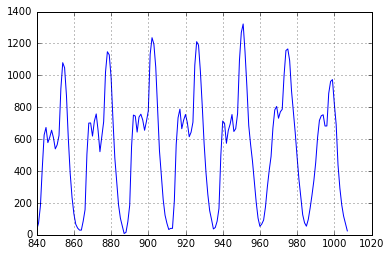

Week: 7


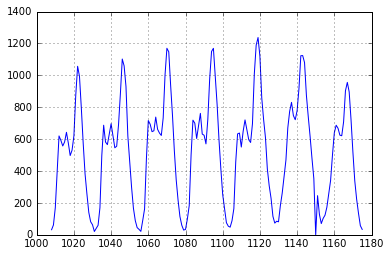

Week: 8


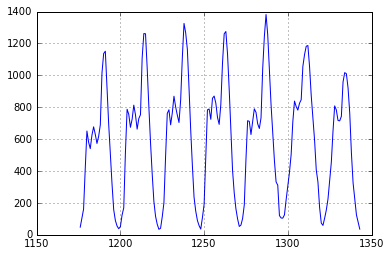

Week: 9


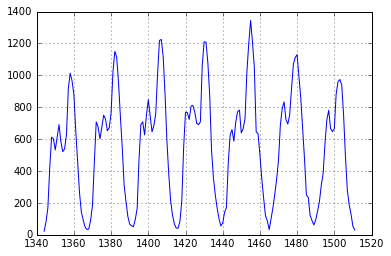

Week: 10


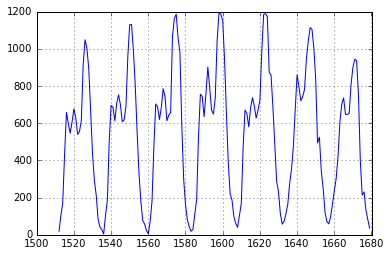

In [4]:
## visualize weekly 

print('Pringing out Weekly patterns:') 

for i in range(10): 
    print('Week: ' + str(i + 1))
    plt.figure 
    plt.plot(ts_data.loc[i * 168:i * 168 + 168 - 1]['Index'].as_matrix(), ts_data.loc[i * 168:i * 168 + 168 - 1]['SupplyHours'].as_matrix()) 
    plt.grid() 
    plt.show() 



<class 'numpy.float64'>
(42, 168)


/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


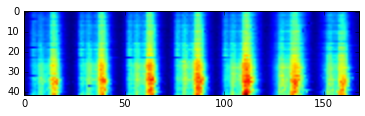

In [24]:
import numpy 
import scipy 
import tensorflow as tf 

## process daily patterns 
a = 7055.0 / 24 

D = ts_data.loc[:]['SupplyHours'].as_matrix() 
D = np.reshape(D, [-1, 168]) 

plt.imshow(D.astype(np.float32))
plt.show() 


In [19]:
import pickle 

pickle.dump(D, open('save_crino_supplyhour_data.p', 'wb')) 
